In [105]:
import pandas as pd 
import numpy as np 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
fifa_ds = pd.read_csv('fifa_players.csv')
fifa_ds.head

<bound method NDFrame.head of        wage_eur   age  height_cm  weight_kg        nationality_name  overall  \
0      320000.0  34.0      170.0       72.0            b'Argentina'     93.0   
1      270000.0  32.0      185.0       81.0               b'Poland'     92.0   
2      270000.0  36.0      187.0       83.0             b'Portugal'     91.0   
3      270000.0  29.0      175.0       68.0               b'Brazil'     91.0   
4      350000.0  30.0      181.0       70.0              b'Belgium'     91.0   
...         ...   ...        ...        ...                     ...      ...   
19173    1000.0  22.0      180.0       64.0             b'China PR'     47.0   
19174     500.0  19.0      175.0       70.0  b'Republic of Ireland'     47.0   
19175     500.0  21.0      178.0       72.0  b'Republic of Ireland'     47.0   
19176     500.0  19.0      173.0       66.0  b'Republic of Ireland'     47.0   
19177     500.0  19.0      167.0       61.0                b'India'     47.0   

       po

In [107]:
#Check for null values 
fifa_ds.isna().sum()

wage_eur                      0
age                           0
height_cm                     0
weight_kg                     0
nationality_name              0
overall                       0
potential                     0
attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
attacking_short_passing       0
attacking_volleys             0
skill_dribbling               0
skill_curve                   0
skill_fk_accuracy             0
skill_long_passing            0
skill_ball_control            0
movement_acceleration         0
movement_sprint_speed         0
movement_agility              0
movement_reactions            0
movement_balance              0
defending_standing_tackle     0
defending_sliding_tackle      0
goalkeeping_diving            0
goalkeeping_handling          0
goalkeeping_kicking           0
goalkeeping_positioning       0
goalkeeping_reflexes          0
dtype: int64

In [109]:
#Check for datatypes 
fifa_ds.dtypes

wage_eur                      float64
age                           float64
height_cm                     float64
weight_kg                     float64
nationality_name               object
overall                       float64
potential                     float64
attacking_crossing            float64
attacking_finishing           float64
attacking_heading_accuracy    float64
attacking_short_passing       float64
attacking_volleys             float64
skill_dribbling               float64
skill_curve                   float64
skill_fk_accuracy             float64
skill_long_passing            float64
skill_ball_control            float64
movement_acceleration         float64
movement_sprint_speed         float64
movement_agility              float64
movement_reactions            float64
movement_balance              float64
defending_standing_tackle     float64
defending_sliding_tackle      float64
goalkeeping_diving            float64
goalkeeping_handling          float64
goalkeeping_

In [111]:
fifa_ds.describe

<bound method NDFrame.describe of        wage_eur   age  height_cm  weight_kg        nationality_name  overall  \
0      320000.0  34.0      170.0       72.0            b'Argentina'     93.0   
1      270000.0  32.0      185.0       81.0               b'Poland'     92.0   
2      270000.0  36.0      187.0       83.0             b'Portugal'     91.0   
3      270000.0  29.0      175.0       68.0               b'Brazil'     91.0   
4      350000.0  30.0      181.0       70.0              b'Belgium'     91.0   
...         ...   ...        ...        ...                     ...      ...   
19173    1000.0  22.0      180.0       64.0             b'China PR'     47.0   
19174     500.0  19.0      175.0       70.0  b'Republic of Ireland'     47.0   
19175     500.0  21.0      178.0       72.0  b'Republic of Ireland'     47.0   
19176     500.0  19.0      173.0       66.0  b'Republic of Ireland'     47.0   
19177     500.0  19.0      167.0       61.0                b'India'     47.0   

     

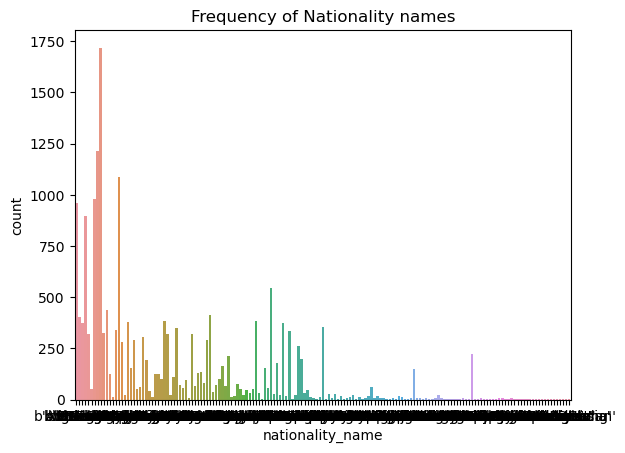

In [113]:
#Try to understand the frequency of nationality names
sns.countplot(x='nationality_name', data=fifa_ds)
plt.title('Frequency of Nationality names')
plt.show()

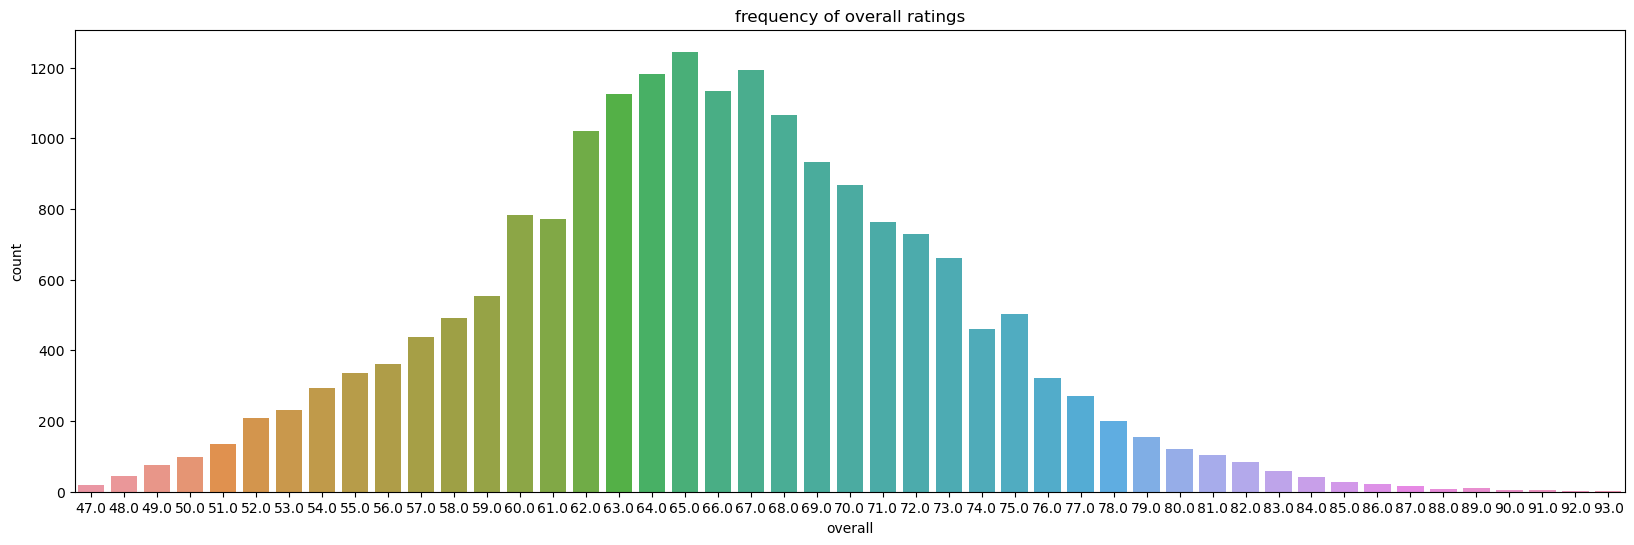

In [114]:
#Try to Understand the Number of players with different Overall ratings
plt.figure(figsize=(20, 6))
sns.countplot(x='overall', data=fifa_ds) 
plt.title('frequency of overall ratings') 
plt.show()

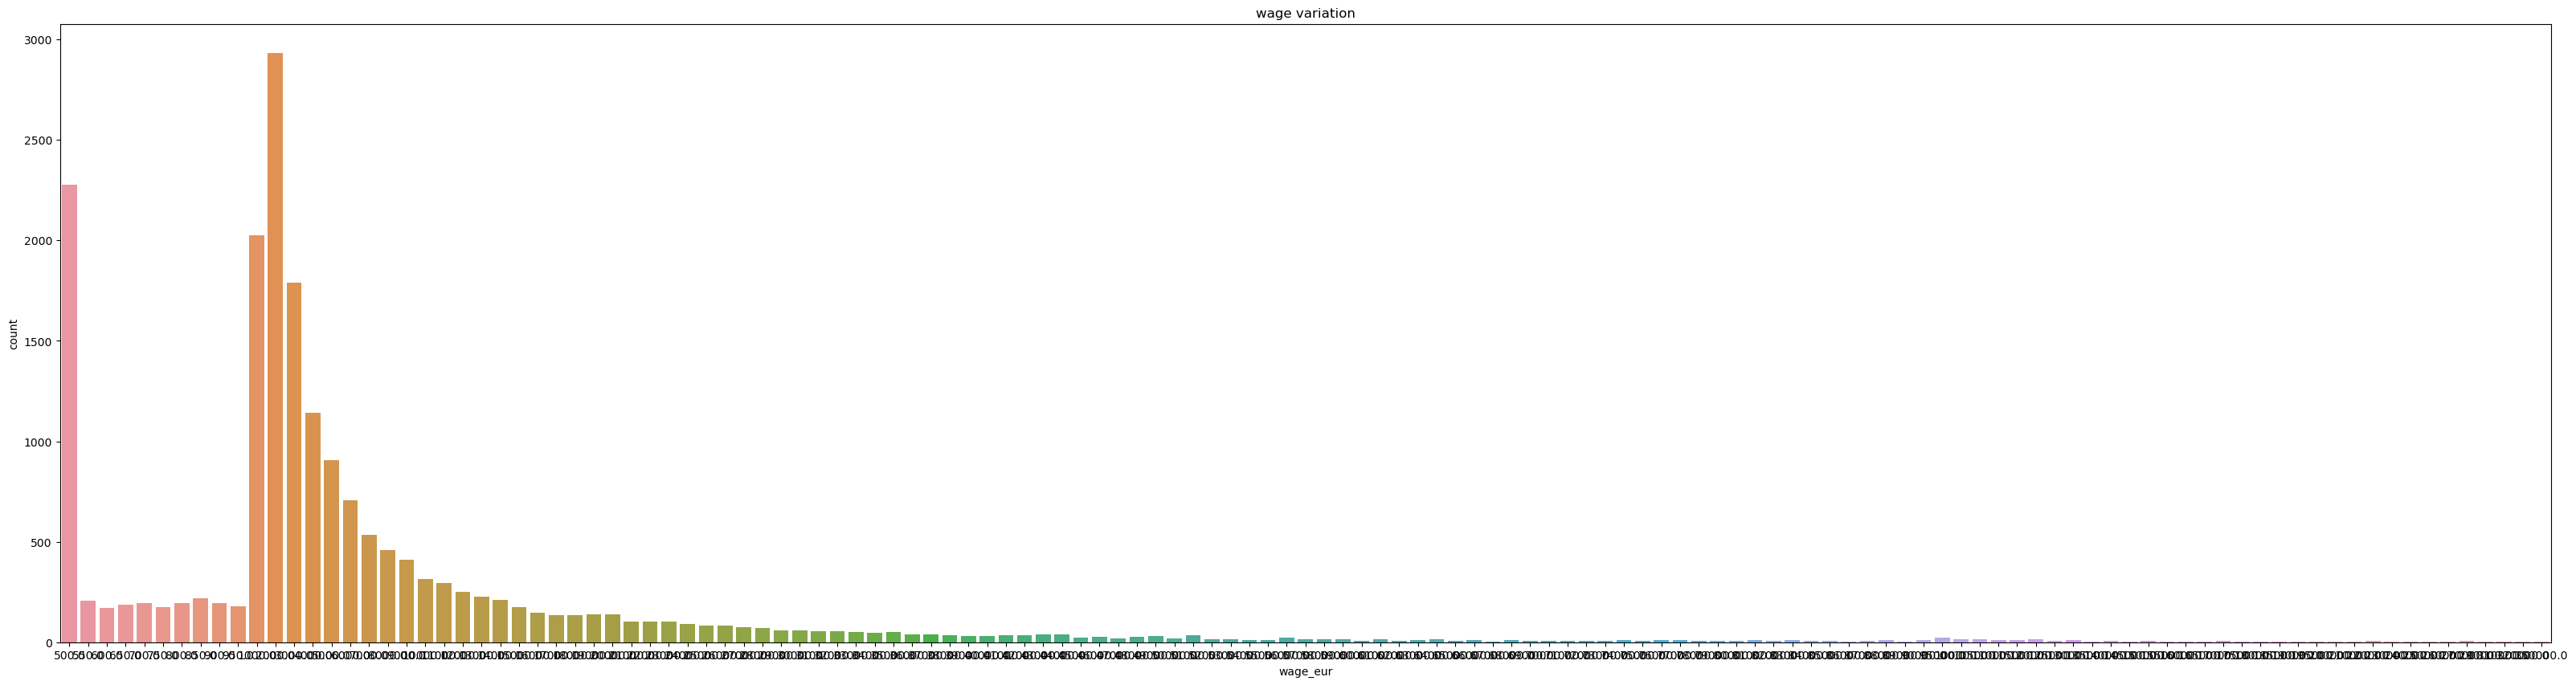

In [115]:
#Understanding wage variation 
plt.figure(figsize=(40,10)) 
sns.countplot(x='wage_eur', data=fifa_ds) 
plt.title('wage variation') 
plt.show()

In [117]:
#Pre-Processing 
#Drop nationality name since it is an object value 
fifa_ds.drop('nationality_name', axis=1, inplace=True)
#Check if column name was dropped 
fifa_ds.head()

,wage_eur,age,height_cm,weight_kg,overall,potential,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,...,movement_agility,movement_reactions,movement_balance,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,320000.0,34.0,170.0,72.0,93.0,93.0,85.0,95.0,70.0,91.0,...,91.0,94.0,95.0,35.0,24.0,6.0,11.0,15.0,14.0,8.0
1,270000.0,32.0,185.0,81.0,92.0,92.0,71.0,95.0,90.0,85.0,...,77.0,93.0,82.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0
2,270000.0,36.0,187.0,83.0,91.0,91.0,87.0,95.0,90.0,80.0,...,86.0,94.0,74.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0
3,270000.0,29.0,175.0,68.0,91.0,91.0,85.0,83.0,63.0,86.0,...,96.0,89.0,84.0,32.0,29.0,9.0,9.0,15.0,15.0,11.0
4,350000.0,30.0,181.0,70.0,91.0,91.0,94.0,82.0,55.0,94.0,...,79.0,91.0,78.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0


In [119]:
#Check for duplicated rows 
fifa_ds.duplicated().sum()

0

In [195]:
# relevant features for the feature engineering
features = fifa_ds[['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'attacking_crossing']]
target = fifa_ds['wage_eur']

In [197]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [199]:
#Log transformation for skewed target data 
target = target.apply(lambda x: np.log(x + 1))

In [201]:
#Initialize and train the model 
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [203]:
y_pred = model.predict(X_test)


In [205]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 247480515.43525928
R-squared (R²): 0.3728311250072667


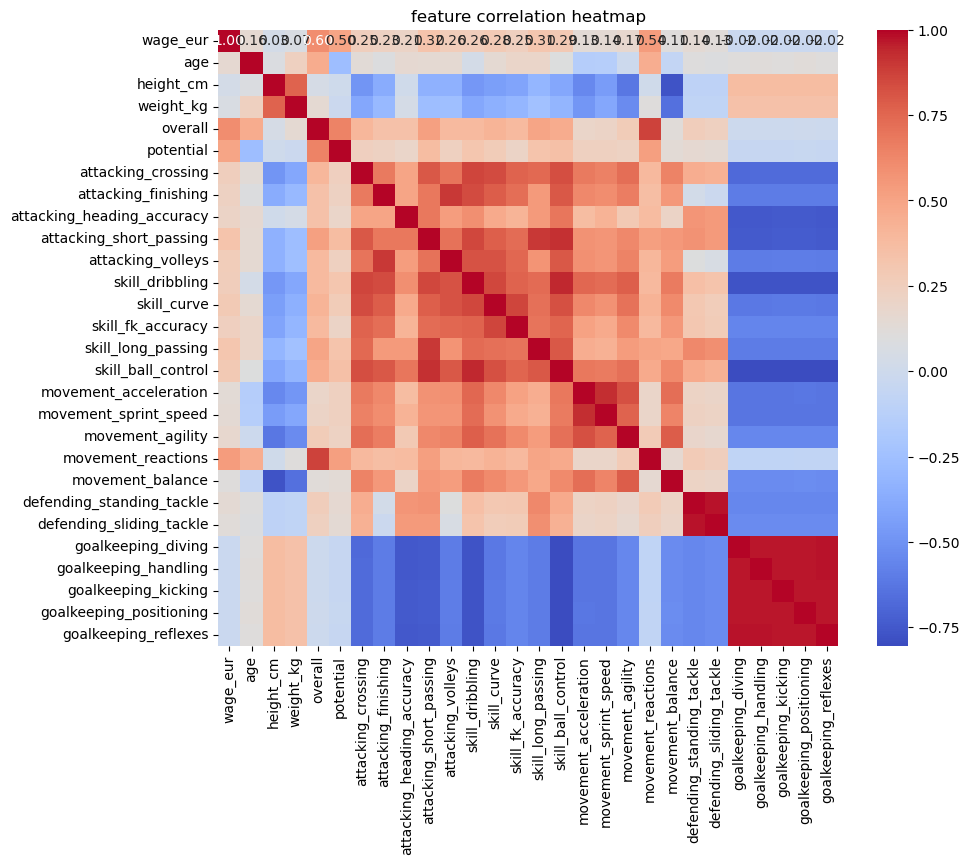

In [207]:
#Correlation Heatmap 
plt.figure(figsize=(10,8)) 
correlation_matrix = fifa_ds.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") 
plt.title("feature correlation heatmap")
plt.show()

In [208]:
#Expirement 2
SGDRegressor_pipe = Pipeline([
    ('StandardScaler', StandardScaler()),
    ('SGDRegressor', SGDRegressor())
]).fit(X_train, y_train)

sgd_y_pred = SGDRegressor_pipe.predict(X_test)

print(f"SGDRegressor MAE: {mean_absolute_error(y_test, sgd_y_pred):.2f}")

SGDRegressor MAE: 8406.33


In [211]:
#Expirement 3
# Creating the pipeline
Ridge_pipe = Pipeline([
    ('StandardScaler', StandardScaler()), 
    ('Ridge', Ridge())
])


Ridge_pipe.fit(X_train, y_train)


rdg_y_pred = Ridge_pipe.predict(X_test)

# Printing the Mean Absolute Error (MAE)
print(f"Ridge MAE: {mean_absolute_error(y_test, rdg_y_pred):.2f}")

Ridge MAE: 8274.70
